In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from configs import load_configs, load_experimental_results

In [5]:
all_configs = load_configs("debug_experiment")
res = load_experimental_results(all_configs)
final_res = load_experimental_results(all_configs, final=True)

In [14]:
columns = [col for col in res.columns if col not in ['seed', 'id', 'loss', 'test_loss', 'batch_size', 'train_entropy', 'test_entropy']]

In [15]:
mean = res.groupby(columns)[['loss', 'test_loss']].mean().reset_index()
std = res.groupby(columns)[['loss', 'test_loss']].std().reset_index()

for name in ['data_complexity', 'nb_factors']:
    std[name] = mean[name]

mean.set_index('epoch', inplace=True)
std.set_index('epoch', inplace=True)


In [16]:
mode = 'generalization'
my_mean = mean[mean['mode'] == mode]
my_std = std[std['mode'] == mode]

all_mean = []
all_std = []

alphas = final_res['alphas'].unique()
for alpha in alphas:
    all_mean.append(my_mean[my_mean['alphas'] == alpha])
    all_std.append(my_std[my_std['alphas'] == alpha])   

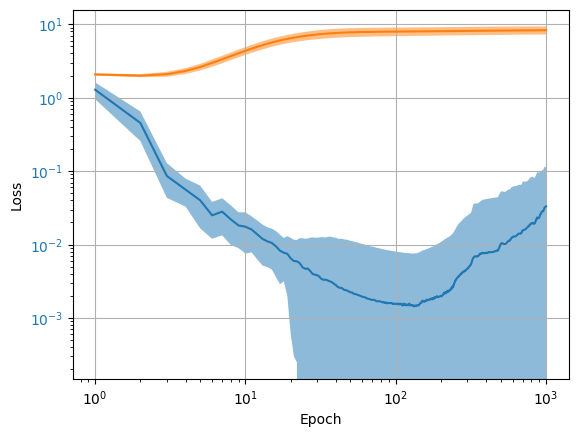

In [19]:
name = 'test_loss'

fig, ax = plt.subplots()
color = 'C0'
for val, val_std in zip(all_mean, all_std):
    ax.plot(val[name])
    ax.fill_between(val.index, val[name] - val_std[name], val[name] + val_std[name], alpha=0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.tick_params(axis='y', labelcolor=color)

# ax2 = ax.twinx()
# color = 'C1'
# for val, val_std in zip([compression_mean, mean1], [compression_std, std]):
#     ax2.plot(val['nb_factors'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_ylabel(r'Number $k$ of factors')

ax.grid()
# ax2.grid(alpha=0.25)